# Metric Evaluation.

The metric should estimate "how much two group of signals are" different.

The metric is computed between the input 'the controling' and the output 'the controlled' signals.

In [1]:
import pandas as pd
import numpy as np
from utils import dataLoader
from utils import metric
import itertools
import matplotlib.pyplot as plt

In [2]:
SEQUENCE_LENGTH = 32
GRANULARITY = 1
OVERLAP = 0.05
BS = 64

ins = [0, 1]
outs= [2,3,4,5]

prod = np.array(list(itertools.product(ins, outs)))

ins = prod[:, 0]
outs = prod[:, 1]

cols = ['in_c1', 'in_c2', 'out_c1', 'out_c2', 'out_c3', 'out_c4', 'material velocity']

N_SEQUENCES = 50
SIGNATURE_LEN = 16

In [3]:
content_dset_train, content_dset_valid = dataLoader.loading_wrapper("data/simulated_dataset/01 - Source Domain_standardized.h5", SEQUENCE_LENGTH, GRANULARITY, OVERLAP, BS, shuffle=False)

content_batch = dataLoader.get_batches(content_dset_train, N_SEQUENCES)

# Output Min, Max, Mean.
content_signature = metric.signature_on_batch(content_batch, ins, outs, SIGNATURE_LEN)
# content_signature = np.mean(content_signature, axis=0)

# Test on our Standardized Dataset

## Input Noise

In [4]:
dataset_path = [
    "data/simulated_dataset/input_noise/0.25_standardized.h5",
    "data/simulated_dataset/input_noise/0.50_standardized.h5",
    "data/simulated_dataset/input_noise/0.75_standardized.h5",
    "data/simulated_dataset/input_noise/1.00_standardized.h5",
    "data/simulated_dataset/input_noise/1.25_standardized.h5",
    "data/simulated_dataset/input_noise/1.50_standardized.h5",
    "data/simulated_dataset/input_noise/1.75_standardized.h5",
    "data/simulated_dataset/input_noise/2.00_standardized.h5",
    "data/simulated_dataset/input_noise/2.25_standardized.h5",
    "data/simulated_dataset/input_noise/2.50_standardized.h5"
]

In [5]:
def metric_on_datasets(dset_paths:list, ref_signature):
    _metrics = []
    for path in dset_paths:

        _df_train, _ = dataLoader.loading_wrapper(path, SEQUENCE_LENGTH, GRANULARITY, OVERLAP, BS)

        _df_batch = dataLoader.get_batches(_df_train, N_SEQUENCES)

        style_signature = metric.signature_on_batch(_df_batch, ins, outs, SIGNATURE_LEN)

        _metric = metric.signature_metric(content_signature, style_signature)
        
        _metrics.append(_metric)

    return np.array(_metrics)

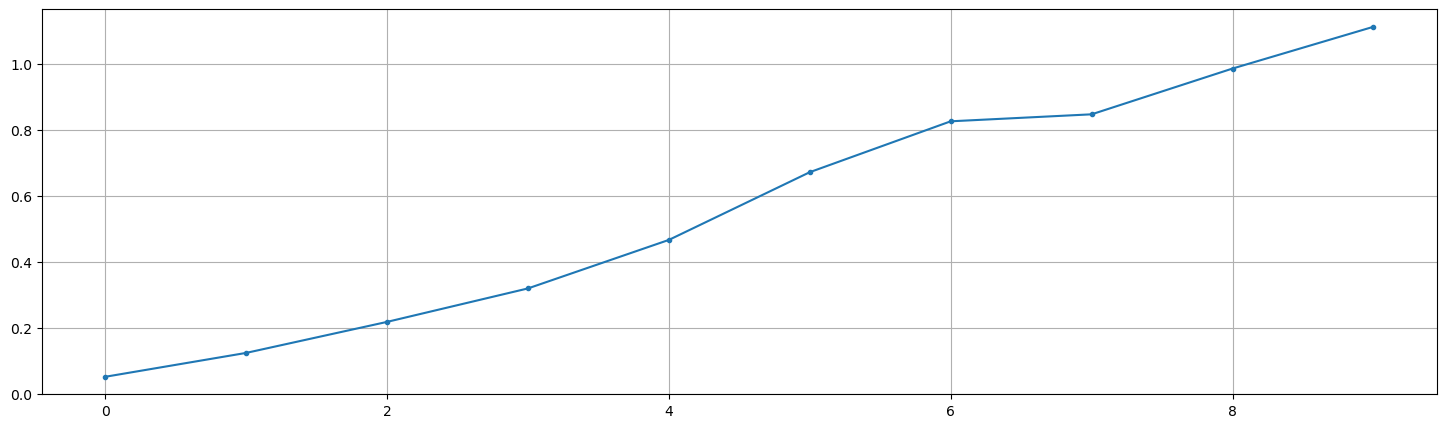

In [6]:
input_noise_matrics = metric_on_datasets(dataset_path, content_signature)

plt.figure(figsize=(18, 5))

plt.plot(input_noise_matrics, '.-')

plt.grid()


## Output Noise.

In [7]:
dataset_path = [
    "data/simulated_dataset/output_noise/0.25_standardized.h5",
    "data/simulated_dataset/output_noise/0.50_standardized.h5",
    "data/simulated_dataset/output_noise/0.75_standardized.h5",
    "data/simulated_dataset/output_noise/1.00_standardized.h5",
    "data/simulated_dataset/output_noise/1.25_standardized.h5",
    "data/simulated_dataset/output_noise/1.50_standardized.h5",
    "data/simulated_dataset/output_noise/1.75_standardized.h5",
    "data/simulated_dataset/output_noise/2.00_standardized.h5",
    "data/simulated_dataset/output_noise/2.25_standardized.h5",
    "data/simulated_dataset/output_noise/2.50_standardized.h5"
]

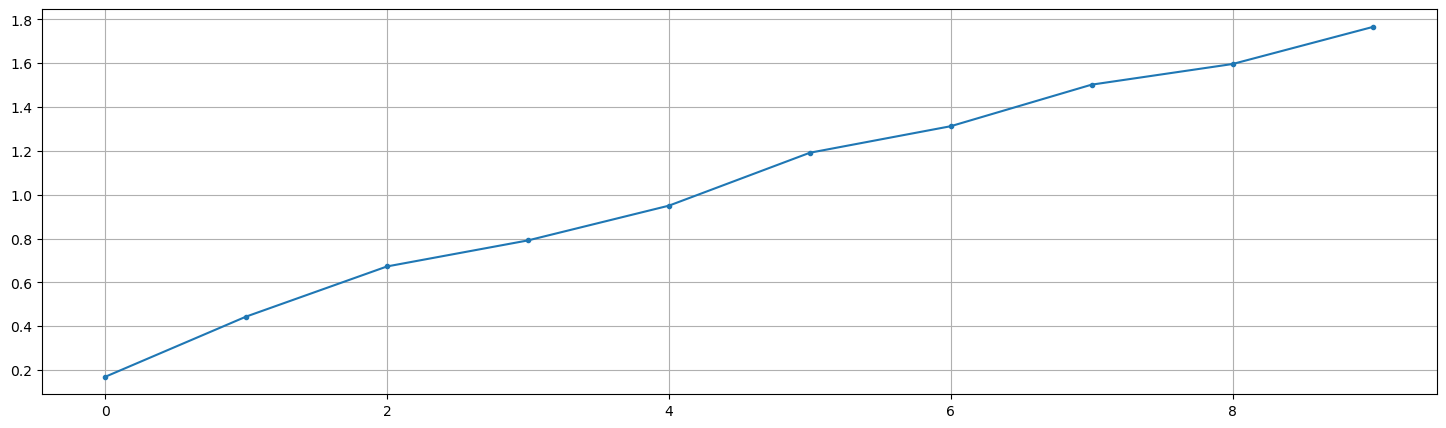

In [8]:
output_noise_matrics = metric_on_datasets(dataset_path, content_signature)

plt.figure(figsize=(18, 5))

plt.plot(output_noise_matrics, '.-')

plt.grid()

## Time Shift

In [9]:
dataset_path = [
    "data/simulated_dataset/time_shift/0_standardized.h5",
    "data/simulated_dataset/time_shift/2_standardized.h5",
    "data/simulated_dataset/time_shift/4_standardized.h5",
    "data/simulated_dataset/time_shift/6_standardized.h5",
    "data/simulated_dataset/time_shift/8_standardized.h5",
    "data/simulated_dataset/time_shift/10_standardized.h5",
    "data/simulated_dataset/time_shift/12_standardized.h5",
    "data/simulated_dataset/time_shift/14_standardized.h5",
    "data/simulated_dataset/time_shift/16_standardized.h5",
    "data/simulated_dataset/time_shift/18_standardized.h5"
]

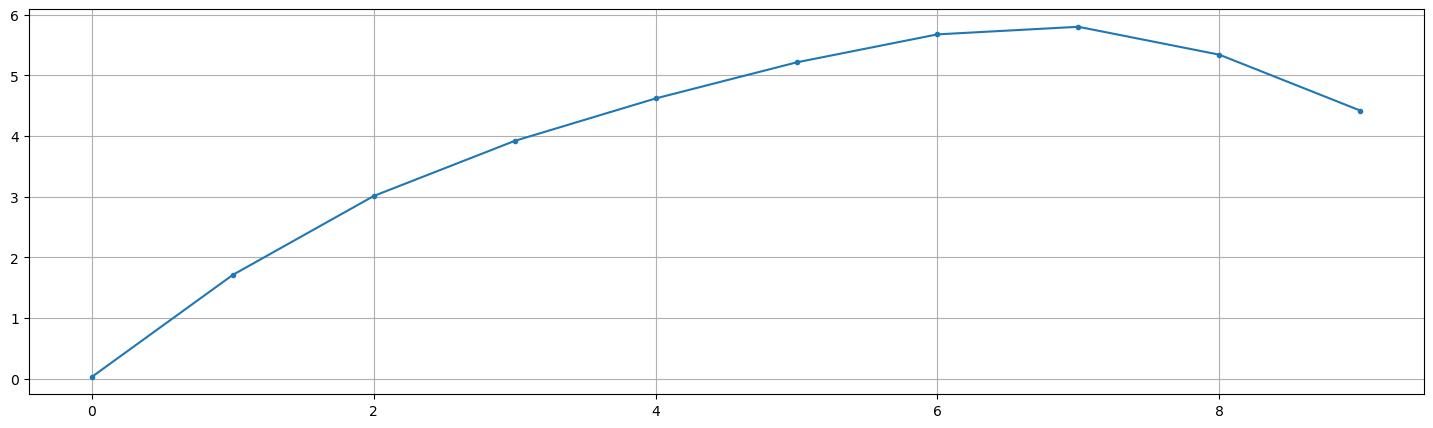

In [10]:
time_shift_matrics = metric_on_datasets(dataset_path, content_signature)

plt.figure(figsize=(18, 5))

plt.plot(time_shift_matrics, '.-')

plt.grid()

## Causal Shift

In [11]:
dataset_path = [
    "data/simulated_dataset/causal_shift/0.00_standardized.h5", 
    "data/simulated_dataset/causal_shift/0.10_standardized.h5", 
    "data/simulated_dataset/causal_shift/0.20_standardized.h5", 
    "data/simulated_dataset/causal_shift/0.30_standardized.h5", 
    "data/simulated_dataset/causal_shift/0.40_standardized.h5", 
    "data/simulated_dataset/causal_shift/0.50_standardized.h5", 
    "data/simulated_dataset/causal_shift/0.60_standardized.h5", 
    "data/simulated_dataset/causal_shift/0.70_standardized.h5", 
    "data/simulated_dataset/causal_shift/0.80_standardized.h5", 
    "data/simulated_dataset/causal_shift/0.90_standardized.h5"
]

/home/henrihoyez/time_series_style_transfer/utils/metric.py:16: RuntimeWarning: overflow encountered in multiply
  return np.nansum((a- nan_mean_a)* (v- nan_mean_b), axis=1)
/home/henrihoyez/anaconda3/envs/tf3/lib/python3.10/site-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/henrihoyez/time_series_style_transfer/utils/metric.py:39: RuntimeWarning: overflow encountered in multiply
  augmented_cov = av/np.sqrt(aa*vv)+ _mean_diff


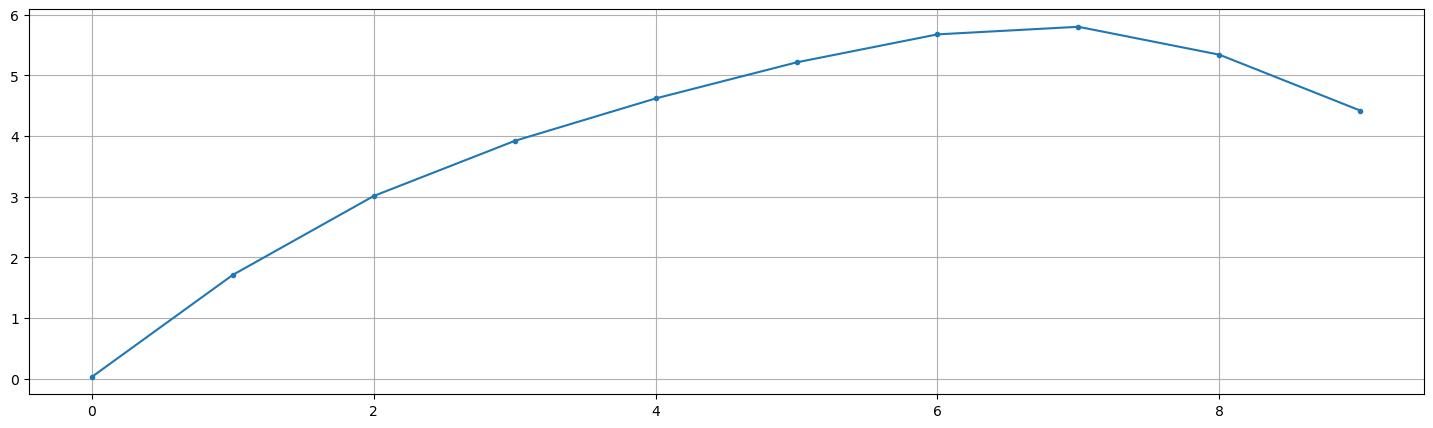

In [12]:
causal_shift_matrics = metric_on_datasets(dataset_path, content_signature)

plt.figure(figsize=(18, 5))

plt.plot(time_shift_matrics, '.-')

plt.grid()

## Test on an learning autoencoder

This AE will be learnt on the content dataset.

In [13]:
from tensorflow.python.keras import Input
from tensorflow.python.keras.layers import Conv1D, ReLU, Conv1DTranspose
from tensorflow.python.keras.models import Model


def make_small_ae(seq_shape: tuple):

    _input = Input(seq_shape)

    x = Conv1D(16, 5, 2, padding='same')(_input) 
    x = ReLU()(x)
    
    x =  Conv1D(32, 5, 2, padding='same')(x)
    x = ReLU()(x)
    
    x =  Conv1D(64, 5, 2, padding='same')(x)
    x = ReLU()(x)
    
    x = Conv1DTranspose(64, 5, 2, padding='same')(x)
    x = ReLU()(x)
    
    x = Conv1DTranspose(32, 5, 2, padding='same')(x)
    x = ReLU()(x)
    
    x = Conv1DTranspose(seq_shape[-1], 5, 2, padding='same')(x)
    x = ReLU()(x)
    
    model = Model(_input, x)

    return model

def evaluate_metric(y_true, y_pred):
    
    ytrue = np.array(y_true)
    ypred = np.array(y_pred)

    real_signature = metric.signature_on_batch(ytrue, ins, outs, SIGNATURE_LEN)
    
    style_signature = metric.signature_on_batch(ypred, ins, outs, SIGNATURE_LEN)
    
    return metric.signature_metric(real_signature, style_signature)


model = make_small_ae((SEQUENCE_LENGTH, 7))

model.compile("rmsprop", "mae", metrics=[evaluate_metric])



In [ ]:
import tensorflow as tf
from tensorflow.python.keras.losses import MeanAbsoluteError
from tensorflow.python.keras.optimizer_v2.adam import Adam
from tensorflow.python.keras.metrics import Mean

def train(model:Model, train_dset, valid_dataset, epochs):
    loss = MeanAbsoluteError()
    opt = Adam()
    
    mae_train, mae_valid = [], []
    corr_metric_train, corr_metric_valid = [], []
    
    mae_metric = Mean()
    corr_metric = Mean()
    
    for e in range(epochs):
        mae_metric.reset_state()
        corr_metric.reset_state()
        
        # Train Loop
        for nb, train_seq in enumerate(train_dset.take(100)):
            with tf.GradientTape() as tape:
                y_pred = model(train_seq)
                
                mae = loss(train_seq, y_pred)
                corr = evaluate_metric(train_seq, y_pred)
                
                mae_metric(mae)
                corr_metric(corr)

            gradients = tape.gradient(mae, model.trainable_variables)
            opt.apply_gradients(zip(gradients, model.trainable_variables)) 
            
            print(f"\r[+] Train Epochs {e}: {nb} => MAE: {mae_metric.result():0.3f}, corr metric {mae_metric.result():0.3f}", end="")
         
        mae_train.append(mae_metric.result())
        corr_metric_train.append(mae_metric.result())
        
        # Valid loop:
        print()
        mae_metric.reset_state()
        corr_metric.reset_state()
        # Train Loop
        for nb, train_seq in enumerate(valid_dataset.take(100)):
            y_pred = model(train_seq)
            
            mae = loss(train_seq, y_pred)
            corr = evaluate_metric(train_seq, y_pred)
            
            mae_metric(mae)
            corr_metric(corr)
            
            print(f"\r[+] Valid Epochs {e}: {nb}  => MAE: {mae_metric.result():0.3f}, corr metric {mae_metric.result():0.3f}", end="")
            
        mae_valid.append(mae_metric.result())
        corr_metric_valid.append(mae_metric.result())
        print()
        
    d = {
        "mae_loss":mae_train,
        "mae_valid":mae_valid,
        "corr_metric":corr_metric_train,
        "corr_metric_valid":corr_metric_valid
    }
        
    return model, d
            
        
trained_model, history = train(model, content_dset_train, content_dset_valid, 10)


/home/henrihoyez/time_series_style_transfer/utils/metric.py:39: RuntimeWarning: invalid value encountered in divide
  augmented_cov = av/np.sqrt(aa*vv)+ _mean_diff


[+] Train Epochs 0: 99 => MAE: 0.300, corr metric 0.300
[+] Valid Epochs 0: 57  => MAE: 0.297, corr metric 0.297